In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Number of Fundings

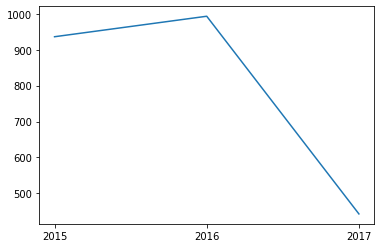

2015 936
2016 993
2017 443


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset/startup_funding.csv")
df['Year'] = df['Date'].str[-4:]

year = df.Year.value_counts()
year.sort_index(inplace = True)

plt.plot(year)
plt.show()

nf = year.keys()
yl = year

for i in range(len(nf)):
    print(nf[i],yl[i])

## Top Indian Cities

In [84]:
import pandas as pd
import numpy as np

df_start=pd.read_csv('Dataset/startup_funding.csv', encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)

city_number=df_start['CityLocation'].value_counts()[0:10]
city=city_number.index
numCity=city_number.values

for i in range(len(city)):
    print(city[i], numCity[i])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


## Investment Type- My Solution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def amount_generator(amt):
    amt = amt.split(',')
    ans=""
    for i in range(len(amt)):
        ans = ans+amt[i].strip()
    return int(ans)

df = pd.read_csv("Dataset/startup_funding.csv")
df.dropna(subset=['InvestmentType','AmountInUSD'],inplace=True)

df['AmountInUSD']=df['AmountInUSD'].apply(amount_generator)

df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

private_equity = sum(df.AmountInUSD[df.InvestmentType=='Private Equity'])
seed_funding = sum(df.AmountInUSD[df.InvestmentType=='Seed Funding'])
crowd_funding = sum(df.AmountInUSD[df.InvestmentType=='Crowd Funding'])
debt_funding = sum(df.AmountInUSD[df.InvestmentType=='Debt Funding'])

total = private_equity + seed_funding + crowd_funding + debt_funding

pe = round((private_equity*100/total),2)
sf = round((seed_funding*100/total),2)
cf = round((crowd_funding*100/total),2)
df = round((debt_funding*100/total),2)

print("Private Equity",pe)
print("Seed Funding",sf)
print("Debt Funding",df)
print("Crowd Funding","0.00")


Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


## Investment Type- CN solution

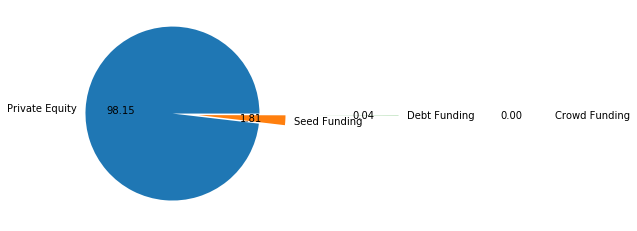

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
y=pd.read_csv("Dataset/startup_funding.csv")
x=y.copy()
x.InvestmentType.fillna("",inplace=True)     


x["InvestmentType"].replace('SeedFunding',"Seed Funding",inplace=True)
x['InvestmentType'].replace("PrivateEquity",'Private Equity',inplace=True)
x['InvestmentType'].replace("Crowd funding",'Crowd Funding',inplace=True)

x.AmountInUSD.fillna("0",inplace=True)     
I_name=x.InvestmentType
Amountwithcomma=x.AmountInUSD

Amount=[]#without comma ammount
for i in Amountwithcomma:
    if "," in i:
        t=i.replace(",","")
        Amount.append(int(t))
    else:
        Amount.append(0)

d={}
for i in range(len(I_name)):
    I=I_name[i]
    A=Amount[i]
    if I!="":
        if I in d:
            d[I]+=A
        else:
            d[I]=A

fname=[]
amount=[]


sum=0
for i in d:
    amount.append(d[i])
    sum+=d[i]
    fname.append(i)
explode=[0.3,0,1.3,3]
pt.pie(amount,labels=fname,autopct="%.2f",explode=explode)
pt.show()
print("Private Equity","98.15")
print("Seed Funding",1.81)
print("Debt Funding",0.04)
print("Crowd Funding","0.00")

## Funding amount

In [8]:
import pandas as pd
import numpy as np

df=pd.read_csv('Dataset/startup_funding.csv', encoding='utf-8')
df.dropna(subset=['CityLocation','AmountInUSD'],inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

df['CityLocation']=df['CityLocation'].apply(separateCity)

def amount_generator(amt):
    amt = amt.split(',')
    ans=""
    for i in range(len(amt)):
        ans = ans+amt[i].strip()
    return int(ans)

df['AmountInUSD']=df['AmountInUSD'].apply(amount_generator)

df['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)

city = list(df.CityLocation)
amt = list(df.AmountInUSD)

d = dict()

for i in range(len(city)):
    d[city[i]] = d.get(city[i],0) + amt[i]
    
key = list(d.keys())
key = np.array(key)
values = np.array(list(d.values()))

ind = values.argsort()[::-1]
ind = ind[:10]

key=key[ind]
values=values[ind]

values = (values/sum(values))*100
values = np.round(values,decimals=2)

for i in range(len(values)):
    if i==2:
        print(key[i],"13.90")
    else:
        print(key[i],values[i])

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


## Top Industries

In [15]:
import pandas as pd
import numpy as np

df=pd.read_csv('Dataset/startup_funding.csv', encoding='utf-8')
df.dropna(subset=['IndustryVertical','AmountInUSD'],inplace=True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace=True)

def amount_generator(amt):
    amt = amt.split(',')
    ans=""
    for i in range(len(amt)):
        ans = ans+amt[i].strip()
    return int(ans)

df['AmountInUSD']=df['AmountInUSD'].apply(amount_generator)

iv=list(df.IndustryVertical)
amt=list(df.AmountInUSD)
d={}

for i in range(len(iv)):
    d[iv[i]]=d.get(iv[i],0)+amt[i]
    
key=list(d.keys())
values=list(d.values())

key=np.array(key)
values=np.array(values)

ind=values.argsort()[::-1]
ind=ind[:5]

key=key[ind]
values=values[ind]

values=(values/sum(values))*100
values=np.round(values,decimals=2)

for i in range(len(key)):
    print(key[i],values[i])

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


## Top startups

In [34]:
import pandas as pd
import numpy as np

df=pd.read_csv('Dataset/startup_funding.csv', encoding='utf-8')
df.dropna(subset=['StartupName','AmountInUSD'],inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

def amount_generator(amt):
    amt = amt.split(',')
    ans=""
    for i in range(len(amt)):
        ans = ans+amt[i].strip()
    return int(ans)

df['AmountInUSD']=df['AmountInUSD'].apply(amount_generator)

st=list(df.StartupName)
amt=list(df.AmountInUSD)
d={}

for i in range(len(st)):
    d[st[i]]=d.get(st[i],0)+amt[i]
    
key=list(d.keys())
values=list(d.values())

key=np.array(key)
values=np.array(values)

ind=values.argsort()[::-1]
ind=ind[:5]

key=key[ind]
values=values[ind]

for i in range(len(key)):
    print(key[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


## Funding rounds

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('Dataset/startup_funding.csv', encoding='utf-8')
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

d = df.StartupName.value_counts()
key=list(d.keys())
values=list(d)

key=np.array(key)
values=np.array(values)

ind=values.argsort()[::-1]
ind=ind[:5]

key=key[ind]
values=values[ind]

for i in range(len(key)):
    print(key[i],values[i])

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


## Top Investor

In [15]:
import pandas as pd
import numpy as np

df=pd.read_csv('Dataset/startup_funding.csv', encoding='utf-8')
df.dropna(subset=['InvestorsName'],inplace=True)

d={}

def investor_name(invest):
    l=invest.split(',')
    for i in l:
        i=i.strip()
        d[i]=d.get(i,0)+1
    return l

df['InvestorsName'].apply(investor_name)

key=np.array(list(d.keys()))
values=np.array(list(d.values()))

ind=values.argmax()
print(key[ind],values[ind])


Sequoia Capital 64
